In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'distutils'

In [114]:
import keras

In [115]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D, Flatten, Dropout

In [116]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap = 'binary')
    plt.title(y_train[i])
    plt.show()

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


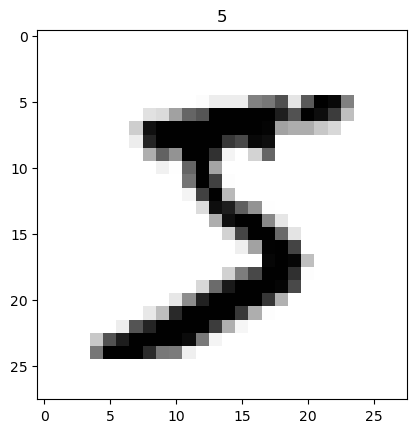

In [117]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

plot_input_img(0)

In [118]:
# Pre-processing

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [119]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [120]:
y_train.shape

(60000, 10)

In [121]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (28,28,1), activation= 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))



In [122]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [127]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_accuracy',min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint("./bestmodel.keras", monitor = 'val_accuracy', verbose = 1, save_best_only= True)

cb = [es,mc]

In [128]:
his = model.fit(X_train,y_train,epochs=50, validation_split=0.3,callbacks=cb)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9897 - loss: 0.0286
Epoch 1: val_accuracy improved from -inf to 0.98878, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9897 - loss: 0.0286 - val_accuracy: 0.9888 - val_loss: 0.0399
Epoch 2/50
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9929 - loss: 0.0209
Epoch 2: val_accuracy did not improve from 0.98878
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9929 - loss: 0.0209 - val_accuracy: 0.9887 - val_loss: 0.0360
Epoch 3/50
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9951 - loss: 0.0160
Epoch 3: val_accuracy improved from 0.98878 to 0.98939, saving model to ./bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9894 - val_loss: 0.0384
Epoch 4/50
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9944 - loss: 0.0165
Epoch 4: val_accuracy did not improve from 0.98939
13